C:\Users\huytr\AppData\Local\Temp\ipykernel_13700\2506846387.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]


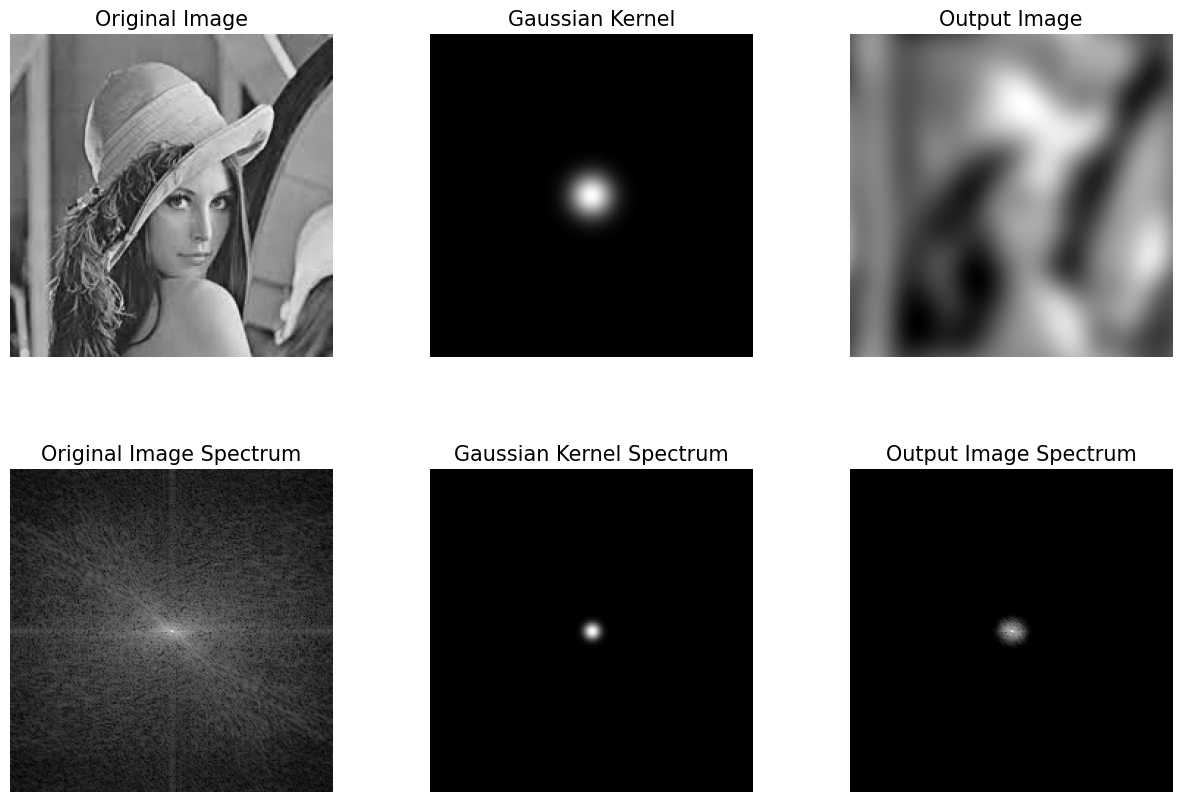

In [12]:
import numpy as np
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import gaussian_filter
from imageio import imread
import matplotlib.pyplot as plt

def main():
    # Đường dẫn ảnh
    image_path = "D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\lena.jpg"

    # Đọc ảnh và chuyển sang grayscale
    im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]

    # Tạo kernel Gaussian trong miền không gian
    sigma = 10  # Độ rộng của Gaussian
    gauss_kernel = np.outer(
        gaussian_1d(im.shape[0], sigma),  # Gaussian theo chiều dọc
        gaussian_1d(im.shape[1], sigma)  # Gaussian theo chiều ngang
    )
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)  # Chuẩn hóa kernel

    # Chuyển đổi ảnh và kernel sang miền tần số
    freq = fft2(im)
    freq_kernel = fft2(ifftshift(gauss_kernel))  # Dịch kernel về đúng tâm

    # Áp dụng định lý tích chập (nhân từng phần tử trong miền tần số)
    convolved = freq * freq_kernel

    # Chuyển kết quả về miền không gian (IDFT)
    im_filtered = np.abs(ifft2(convolved))

    # Hiển thị các kết quả
    display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved)

def gaussian_1d(size, sigma):
    """Hàm tạo Gaussian kernel 1D."""
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x**2 / (2 * sigma**2))
    return gauss

def to_spectrum_display(spectrum):
    """Tăng độ tương phản của phổ bằng cách sử dụng log."""
    spectrum = np.abs(fftshift(spectrum))  # Lấy giá trị tuyệt đối và dịch tâm
    return np.log(1 + spectrum)

def display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved):
    """Hiển thị kết quả."""
    plt.figure(figsize=(15, 10))

    # Hình ảnh gốc
    plt.subplot(2, 3, 1)
    plt.imshow(im, cmap='gray')
    plt.title("Original Image", fontsize=15)
    plt.axis("off")

    # Kernel Gaussian trong miền không gian
    plt.subplot(2, 3, 2)
    plt.imshow(gauss_kernel, cmap='gray')
    plt.title("Gaussian Kernel", fontsize=15)
    plt.axis("off")

    # Hình ảnh sau khi lọc
    plt.subplot(2, 3, 3)
    plt.imshow(im_filtered, cmap='gray')
    plt.title("Output Image", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh gốc
    plt.subplot(2, 3, 4)
    plt.imshow(to_spectrum_display(freq), cmap='gray')
    plt.title("Original Image Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của kernel Gaussian
    plt.subplot(2, 3, 5)
    plt.imshow(to_spectrum_display(freq_kernel), cmap='gray')
    plt.title("Gaussian Kernel Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh sau khi tích chập
    plt.subplot(2, 3, 6)
    plt.imshow(to_spectrum_display(convolved), cmap='gray')
    plt.title("Output Image Spectrum", fontsize=15)
    plt.axis("off")

    # Tinh chỉnh khoảng cách giữa các subplot
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

if __name__ == "__main__":
    main()


C:\Users\huytr\AppData\Local\Temp\ipykernel_13700\2494211734.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]


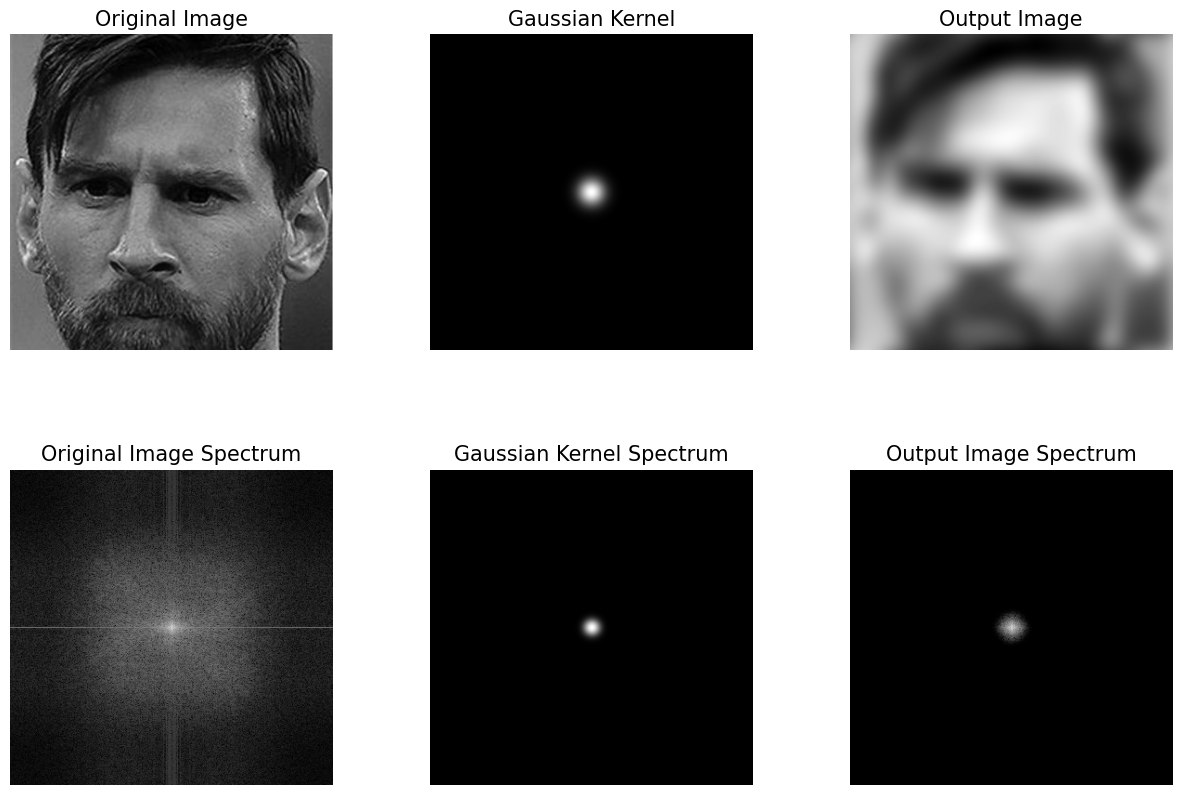

In [13]:
def main():
    # Đường dẫn ảnh
    image_path = "D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\messi.jpg"

    # Đọc ảnh và chuyển sang grayscale
    im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]

    # Tạo kernel Gaussian trong miền không gian
    sigma = 10  # Độ rộng của Gaussian
    gauss_kernel = np.outer(
        gaussian_1d(im.shape[0], sigma),  # Gaussian theo chiều dọc
        gaussian_1d(im.shape[1], sigma)  # Gaussian theo chiều ngang
    )
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)  # Chuẩn hóa kernel

    # Chuyển đổi ảnh và kernel sang miền tần số
    freq = fft2(im)
    freq_kernel = fft2(ifftshift(gauss_kernel))  # Dịch kernel về đúng tâm

    # Áp dụng định lý tích chập (nhân từng phần tử trong miền tần số)
    convolved = freq * freq_kernel

    # Chuyển kết quả về miền không gian (IDFT)
    im_filtered = np.abs(ifft2(convolved))

    # Hiển thị các kết quả
    display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved)

def gaussian_1d(size, sigma):
    """Hàm tạo Gaussian kernel 1D."""
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x**2 / (2 * sigma**2))
    return gauss

def to_spectrum_display(spectrum):
    """Tăng độ tương phản của phổ bằng cách sử dụng log."""
    spectrum = np.abs(fftshift(spectrum))  # Lấy giá trị tuyệt đối và dịch tâm
    return np.log(1 + spectrum)

def display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved):
    """Hiển thị kết quả."""
    plt.figure(figsize=(15, 10))

    # Hình ảnh gốc
    plt.subplot(2, 3, 1)
    plt.imshow(im, cmap='gray')
    plt.title("Original Image", fontsize=15)
    plt.axis("off")

    # Kernel Gaussian trong miền không gian
    plt.subplot(2, 3, 2)
    plt.imshow(gauss_kernel, cmap='gray')
    plt.title("Gaussian Kernel", fontsize=15)
    plt.axis("off")

    # Hình ảnh sau khi lọc
    plt.subplot(2, 3, 3)
    plt.imshow(im_filtered, cmap='gray')
    plt.title("Output Image", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh gốc
    plt.subplot(2, 3, 4)
    plt.imshow(to_spectrum_display(freq), cmap='gray')
    plt.title("Original Image Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của kernel Gaussian
    plt.subplot(2, 3, 5)
    plt.imshow(to_spectrum_display(freq_kernel), cmap='gray')
    plt.title("Gaussian Kernel Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh sau khi tích chập
    plt.subplot(2, 3, 6)
    plt.imshow(to_spectrum_display(convolved), cmap='gray')
    plt.title("Output Image Spectrum", fontsize=15)
    plt.axis("off")

    # Tinh chỉnh khoảng cách giữa các subplot
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

if __name__ == "__main__":
    main()


C:\Users\huytr\AppData\Local\Temp\ipykernel_13700\2832321761.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]


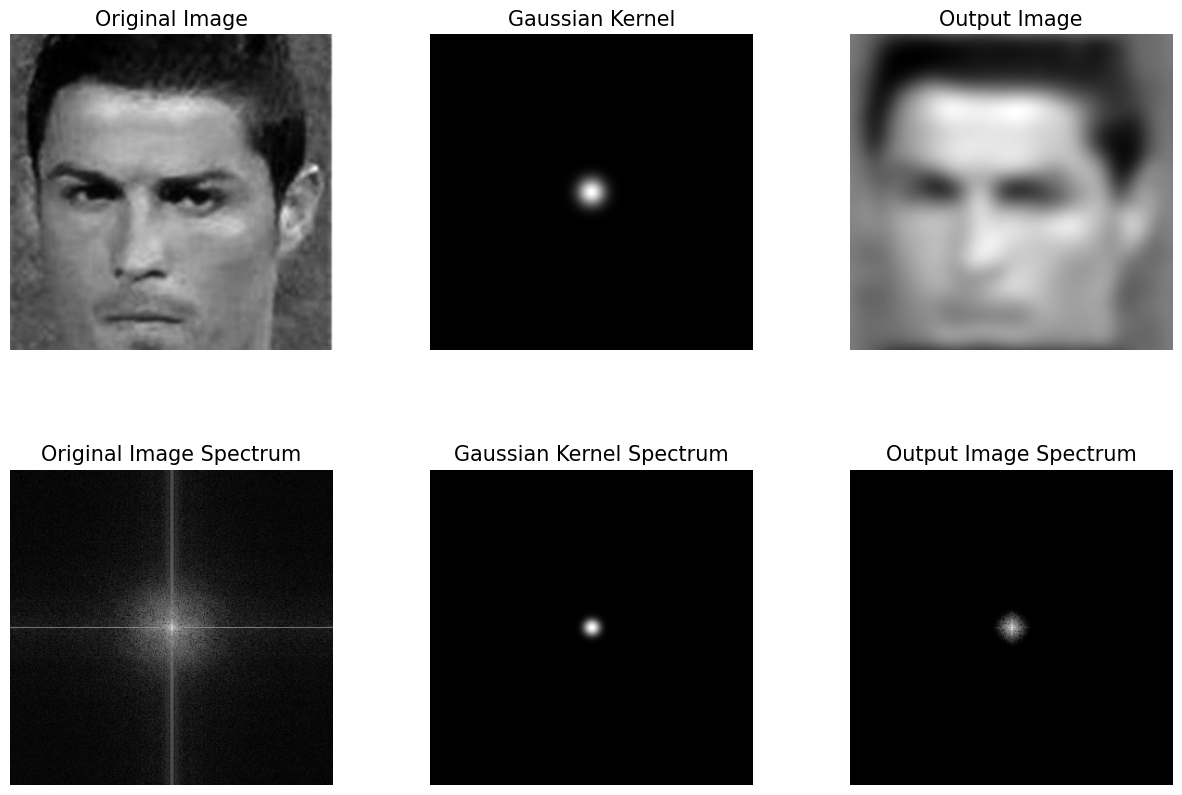

In [14]:
def main():
    # Đường dẫn ảnh
    image_path = "D:\\Learn DL\\Xử lý ảnh\\BTL\\Sandipan_Dey_2018_Sample_Images\\images\\ronaldo.jpg"

    # Đọc ảnh và chuyển sang grayscale
    im = np.mean(imread(image_path), axis=2) / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]

    # Tạo kernel Gaussian trong miền không gian
    sigma = 10  # Độ rộng của Gaussian
    gauss_kernel = np.outer(
        gaussian_1d(im.shape[0], sigma),  # Gaussian theo chiều dọc
        gaussian_1d(im.shape[1], sigma)  # Gaussian theo chiều ngang
    )
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)  # Chuẩn hóa kernel

    # Chuyển đổi ảnh và kernel sang miền tần số
    freq = fft2(im)
    freq_kernel = fft2(ifftshift(gauss_kernel))  # Dịch kernel về đúng tâm

    # Áp dụng định lý tích chập (nhân từng phần tử trong miền tần số)
    convolved = freq * freq_kernel

    # Chuyển kết quả về miền không gian (IDFT)
    im_filtered = np.abs(ifft2(convolved))

    # Hiển thị các kết quả
    display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved)

def gaussian_1d(size, sigma):
    """Hàm tạo Gaussian kernel 1D."""
    x = np.linspace(-size // 2, size // 2, size)
    gauss = np.exp(-x**2 / (2 * sigma**2))
    return gauss

def to_spectrum_display(spectrum):
    """Tăng độ tương phản của phổ bằng cách sử dụng log."""
    spectrum = np.abs(fftshift(spectrum))  # Lấy giá trị tuyệt đối và dịch tâm
    return np.log(1 + spectrum)

def display_results(im, gauss_kernel, im_filtered, freq, freq_kernel, convolved):
    """Hiển thị kết quả."""
    plt.figure(figsize=(15, 10))

    # Hình ảnh gốc
    plt.subplot(2, 3, 1)
    plt.imshow(im, cmap='gray')
    plt.title("Original Image", fontsize=15)
    plt.axis("off")

    # Kernel Gaussian trong miền không gian
    plt.subplot(2, 3, 2)
    plt.imshow(gauss_kernel, cmap='gray')
    plt.title("Gaussian Kernel", fontsize=15)
    plt.axis("off")

    # Hình ảnh sau khi lọc
    plt.subplot(2, 3, 3)
    plt.imshow(im_filtered, cmap='gray')
    plt.title("Output Image", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh gốc
    plt.subplot(2, 3, 4)
    plt.imshow(to_spectrum_display(freq), cmap='gray')
    plt.title("Original Image Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của kernel Gaussian
    plt.subplot(2, 3, 5)
    plt.imshow(to_spectrum_display(freq_kernel), cmap='gray')
    plt.title("Gaussian Kernel Spectrum", fontsize=15)
    plt.axis("off")

    # Phổ tần số của hình ảnh sau khi tích chập
    plt.subplot(2, 3, 6)
    plt.imshow(to_spectrum_display(convolved), cmap='gray')
    plt.title("Output Image Spectrum", fontsize=15)
    plt.axis("off")

    # Tinh chỉnh khoảng cách giữa các subplot
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

if __name__ == "__main__":
    main()
